# Titanic Analysis using Python

#### I will be working with the [Titanic dataset from Kaggle]('D:\\saloni\\saloni\\titanic_train.csv').This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased.We'll use a "semi-cleaned" version of the titanic data set.

### Importing Required Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Load the Dataset

In [39]:
train = pd.read_csv('D:\\saloni\\saloni\\titanic_train.csv')
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


In [40]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

### Missing Data
We are using seaborn to create a simple heatmap to see where we are missing data!

In [41]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

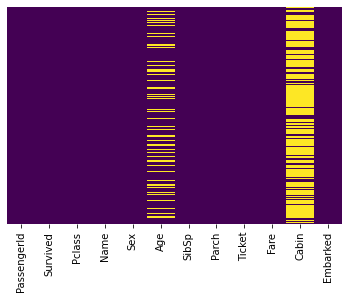

In [42]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

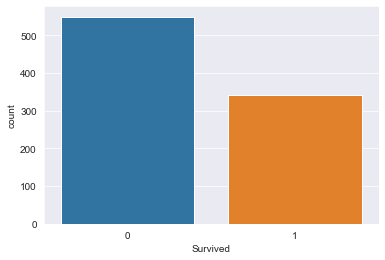

In [43]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

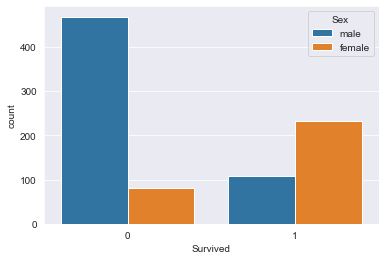

In [44]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue = 'Sex',data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

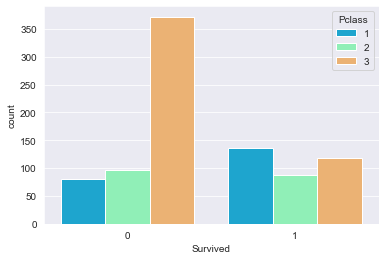

In [45]:
sns.set_style('darkgrid')
sns.countplot(x='Survived', hue = 'Pclass', data=train,palette='rainbow')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

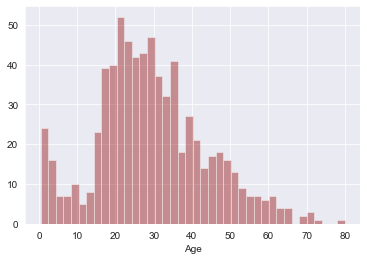

In [46]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

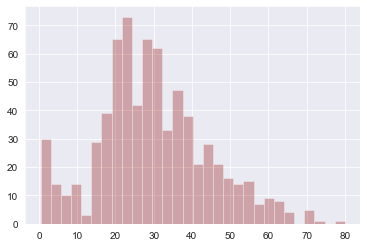

In [47]:
train['Age'].hist(bins = 30,color = 'darkred',alpha = 0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

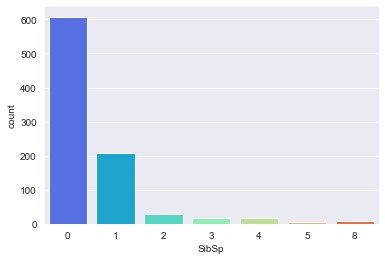

In [48]:
sns.countplot(x='SibSp',data = train,palette = 'rainbow')

<AxesSubplot:>

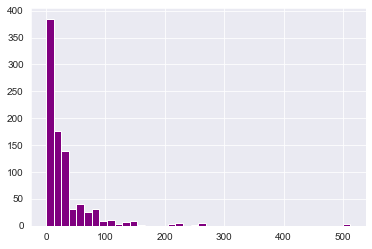

In [49]:
train['Fare'].hist(bins = 40,color = 'purple')

## Data Cleaning
We need fill in the missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

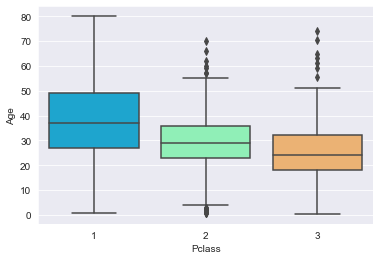

In [50]:
#plt.figure(figsize=(8,4))
sns.boxplot(x = 'Pclass',y = 'Age',data = train,palette = 'rainbow')

#### We can see that the rich passengers in the higher class tend to be older. We'll use these average age values to impute based on Pclass for Age.

In [51]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

*Now apply the function below!*

In [52]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

**Let's check the heatmap again!**

<AxesSubplot:>

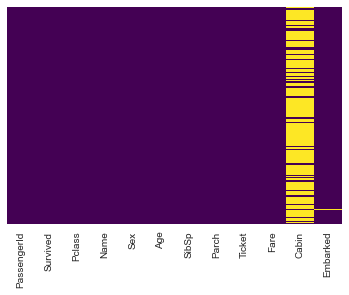

In [53]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### COOL! Now let's drop the Cabin column and the row in Embarked that is NaN.

In [54]:
train.drop('Cabin',axis =1,inplace = True)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [56]:
train.dropna(inplace = True)

## Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [58]:
 pd.get_dummies(train['Embarked'],drop_first = True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [59]:
sex = pd.get_dummies(train['Sex'],drop_first = True)
embark = pd.get_dummies(train['Embarked'],drop_first = True)

## Feature engineering

In [60]:
train.drop(['Name','Ticket','Sex','Embarked'],axis = True,inplace =True)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [62]:
train = pd.concat([train,sex,embark],axis = 1)

In [63]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


*Great! The data is ready for the model!*

## Model Building
We will start by splitting the data into a training set and test set.

### Train Test Split

#### dropping the survived column because it is the dependent feature

In [64]:
train.drop('Survived',axis = 1).head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [65]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [66]:
 from sklearn.model_selection import train_test_split
    

In [67]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)
#Here train.drop('Survived')is x axis and train['Survived'] is y-axis

### Training and Predicting

In [72]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=2)

In [73]:
model = RandomForestClassifier(n_estimators=200, bootstrap=False, criterion= 'gini', min_samples_leaf=5, min_samples_split=2, random_state=2)

In [74]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=5, n_estimators=200,
                       random_state=2)

In [75]:
model.predict(X_test)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(X_test))*100

83.52059925093633

In [77]:
from sklearn.model_selection import cross_val_score
Overall_accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print(Overall_accuracies)
Overall_accuracies.mean()*100

[0.816      0.84       0.78225806 0.76612903 0.84677419]


81.02322580645162

### So we have got 83% Accuracy Which is Pretty Good!

# Thank you!!